# Analysis of Effective Altruism Facebook Group Posts
## 2012 - 2015

Data taken from https://docs.google.com/spreadsheets/d/1zRc2AvZ_nWEyXdOPz9XzjuXszMa92C9WUSVOul-NJyo/edit#gid=1562892504



### Intro

This report is a quick analysis of the data on posts made to the Effective Altruism Facebook Group captures by the Sociograph API. I've attempted to plot a few things which might be of interest.

### Trends in the Group

The story of the group's growth is been more complicated than simple linear growth, stagnation, or decline. Instead the trends need to be described piecewise with different things happening in different periods, and different metrics behaving in different ways. 

#### Overall/Posts
More or less, there was a period of rapid growth following the group's creation in late 2012. The rate of posting achieved in mid-2013 has not been exceeded by more than ~10% even now. Following the rapid growth, the group plateuaed in activity for at least six months, and then began a period of decline. Most recently, beginning in early 2015 there was been a renewal of significant growth taking the group beyond the levels of activity first achieved in mid-2013.

The trends do not have obvious causes to me. The decline starts before the creation of the Effective Altruism Forum, and the new period of growth started before the publication of the "Most Good You Can Do" and "Doing Good Better." I look forward to hypothesis from others.

#### Comments
The trends described for levels of posting do not apply to other metrics (Comments/Likes/Shares). Significantly, both absolute and per-post levels of commenting have been declining since mid-2013. This likely reflects a shift in how people engage with the group.

#### Likes
Unlike the other metrics, Likes have consistently increased since the group was created. Perhaps because Likes most closely track membership numbers, which I assume have monotonically risen. Not just in absolute levels, but also the number of likes per post has risen.

#### Contributors
The number of unique contributors posting to the group has risen each year, however the proportion of people posting only a single post or two in a year has been increasing yearly. The number of posters making 10 or more posts a year has stayed steadied or dropped. So more posters, but fewer frequently active ones.

#### Contributor Leaderboards
For people's interest, I've included leaderboards on the most frequent posters in the group for each year. Half or more of the top contributors list has stayed the same since 2013, conversely, half has changed. The change in top posters might line up with something of a change in the group's character and focus. 


In [2]:
# Imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

matplotlib.style.use('ggplot')
sns.set_style("darkgrid", {'ytick.major.size': 10.0})
sns.set_context("talk", font_scale=1.1)

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
posts = pd.read_csv('Effective Altruism facebook group posts data - posts (1).csv')
posts['Date'] = pd.to_datetime(posts['createdTime'])
posts = posts.set_index('Date')
posts['postsCount']=1 #use later in groupby.sum to do to count()

# Are we growing? Weekly Total Posts/Comments/Likes Over Time

### Figure 1: Plots of Weekly Post/Comments/Likes over Time

c:\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


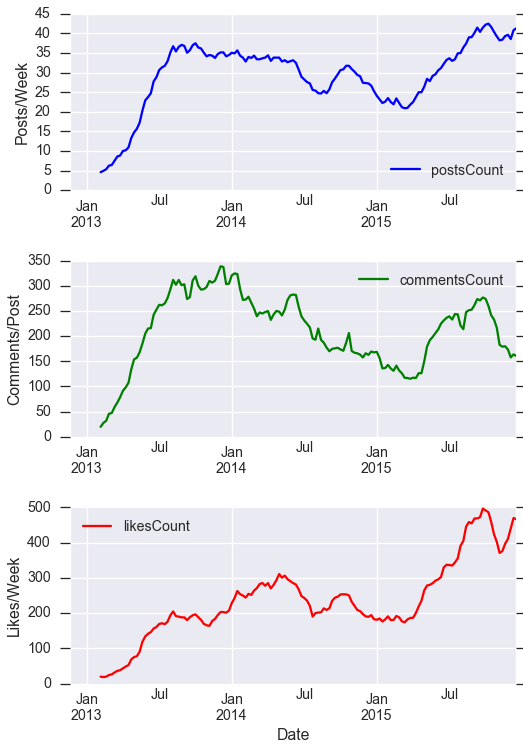

In [4]:
Posts = posts.resample('W',how='sum')[['postsCount','commentsCount','likesCount']]

fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(hspace=0.4)
ax = fig.add_subplot(1,1,1)

Ax = pd.rolling_mean(Posts,12).plot(subplots=True,ax=ax)
Ax[0].set_ylabel('Posts/Week'); Ax[0].set_xlabel('')
Ax[1].set_ylabel('Comments/Post'); Ax[1].set_xlabel('')
Ax[2].set_ylabel('Likes/Week'); Ax[1].set_xlabel('')


The above plot shows the total number of weekly posts/comments/likes for the entire history of the EA Facebook Group. The plots reveal the trends of the group are not simple stories of growth, decline, or stagnation. Instead there have been different periods, and the metrics diverge.

#### **Posts**
Examining the plot of posts there are 3-4 phases in the group's history.
Late 2012 - Mid 2013: extremely rapid growth following the group's founding
Mid 2013 - Mid 2014: Plateu, posting rates remain constant [1]. 
Mid 2014 - Early 2015: Posting activity declines, although with a bump.
Early 2015 - A new period of strong growth begins. It is not clear if this period will continue.

I hypothesised that the decline in posting was due to the creation of the EA Forum in September 2014, but there's a downwards trend which began earlier. My exploration of that period are later in this report. 

I am not aware of events which would cause the sudden growth in early January. Peter Singer's "The Most Good You Can Do" and Will MacAskill's "Doing Good Better" weren't published until later in the year.


#### **Comments**
The total number of comments/week differs in trend from posts. Following the "formation period", commenting has been declining steadily and significantly, until this recent period of renewed growth. The decline in commenting is more than just a result of decline in posts, since the commenting rate is decreasing faster. This is confirmed below where I plot comments/post over time.


#### **Likes**
Number of Likes has consistently risen (apart from a flat period when everything else was declining). This could be because number of likes is most strongly tied to number of members, which I assume has steadily risen. (I do not have data on membership.)



[1] The slight downwards slope is a result of smoothing and is less present in the less heavily smoothed version of this plot in Appendix A.


# Changes in Average Comments/Post and Likes/Post

c:\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


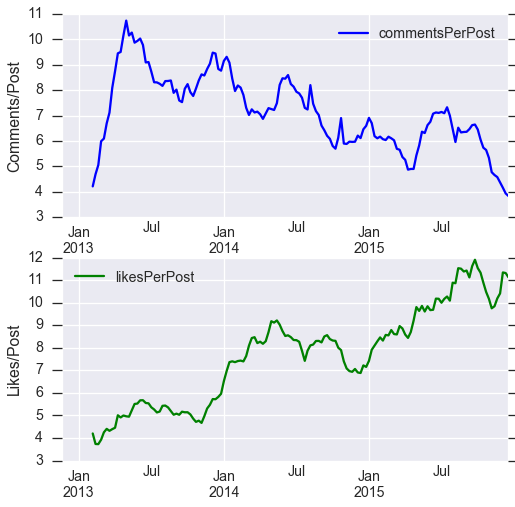

In [5]:
Posts = posts.resample('W',how='mean')[['commentsCount','likesCount']]
Posts.rename(columns={'commentsCount':'commentsPerPost','likesCount':'likesPerPost'}, inplace=True)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

Ax = pd.rolling_mean(Posts,12).plot(subplots=True,ax=ax)
Ax[0].set_ylabel('Comments/Post'); Ax[0].set_xlabel('')
Ax[1].set_ylabel('Likes/Post'); Ax[1].set_xlabel('')
#Ax[2].set_ylabel('Shares/Post'); Ax[2].set_xlabel('') #Not adding anything


#### **Comments per Post**
As noted above, the total number of comments in the group has declined over time, beyond any declines in posting. The plot of average number of comments/post matches this. It could be that over time the group has become less and less a place for discussion.

#### **Likes per Post**
In contrast, the number of likes an average post receives has steadily gone up.

In [6]:
#Create DataFrames for Status and Link Posts Separately
posts_status = posts[posts['type']=='status']
posts_link = posts[posts['type']=='link']
posts_types = pd.DataFrame()
posts_types['status'] = posts_status.resample('W',how='sum').fillna(0)['postsCount']
posts_types['link'] = posts_link.resample('W',how='sum').fillna(0)['postsCount']

# Status-Posts vs Link-Posts

# Also, what effect did the EA Forum have?

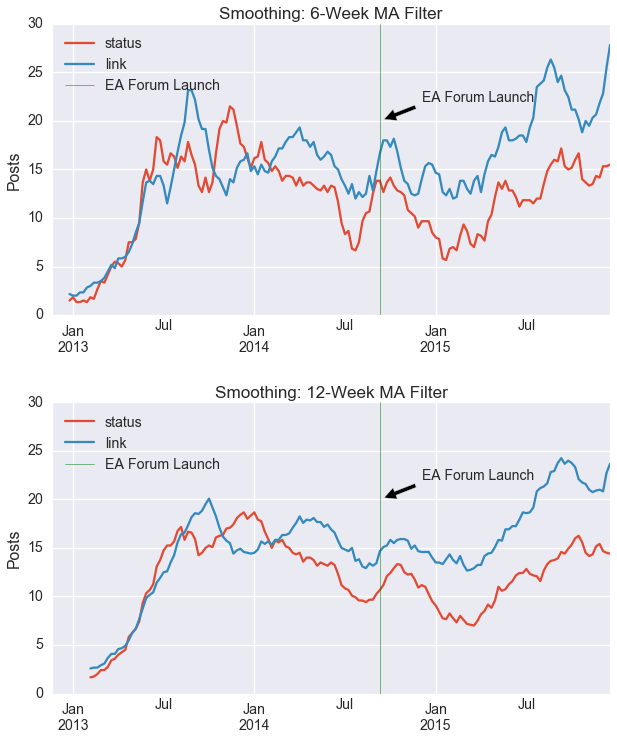

In [23]:
matplotlib.style.use('seaborn-darkgrid')

fig,ax = plt.subplots(2,1,figsize=(10,12))
fig.subplots_adjust(hspace=0.3)
#ax = fig.add_subplot(1,1,1)

smoothing = [6,12]
for i in range(0,2):
    pd.rolling_mean(posts_types,smoothing[i]).plot(ax=ax[i])
    ax[i].axvline(x=pd.to_datetime('2014-09-09'),linewidth=0.5,color='g',label='EA Forum Launch')
    ax[i].annotate('EA Forum Launch', xy=(pd.to_datetime('2014-09-09'), 20),xytext=(pd.to_datetime('2014-12-01'),22),
                arrowprops=dict(facecolor='black',shrink=0.10),fontsize=14
                )
    ax[i].legend(loc='upper left')
    ax[i].set_ylabel('Posts')
    ax[i].set_ylim([0,30])
    ax[i].set_xlabel('')

ax[0].set_title('Smoothing: 6-Week MA Filter')
ax[1].set_title('Smoothing: 12-Week MA Filter')
## The hump just to the right is illusory. The smoothing has the effect of shifting the graph to the right.

**Note:** The above plots are the same apart from level of smoothing applied. Higher levels of smoothing make long-term trends easier to see, but can hide local detail. I therefore provided plots with two levels of smoothing.


I initially hypothesised that the creation of the Effective Altruism Forum would explain the decrease in commenting as discussions which were taking place in the FB Group moved to a better forum. However it seems trends were already in place, although the forum launch may have increased the decline. 

#### **Status Posts vs. Link Posts**
The available data differentiates between types of posts made to the group: statuses (text), links, photos, pictures, and video. There were very few posts on the last three types, but it is interesting to see the differences between status posts and link posts. 

Status-posts and Link-posts are distinguished based on whether the post contains a link. Link posts with a lot of text still count as Links.

Looking at the second subplot, it seems that the rates of Link posting has remained more or less constant at a rate of 15/week, but starting to grow again recently. Conversely, it is the rate of Status-posts which have declined, starting maybe in January 2014.

The rate of Status-Post postings is now (in the period of rapid growth) approaching what is was in the latter half of 2013.


#### EA Forum Launch
The slight bump following the launch is an illusion due to the shifting caused by the Moving Average Filter. As seen in the top plot (also smoothed), the bump begins on/before the date of the EA Forum Launch. The decline of status-post posting does seem steeper immediately after. The plot below zooms in on this period.

In [8]:
postsTypes = posts[(posts['type']=='link')|(posts['type']=='status')].groupby(['type']).mean()
postsTypes[['likesCount','commentsCount','sharesCount']].round(2)

,likesCount,commentsCount,sharesCount
type,,,
link,9.29,5.37,0.72
status,7.21,9.71,0.02


The above table shows the difference in Likes and Comments received by Link and Status posts. 
* Status-posts receive an average of 9.7 comments per post compared to 5.4 comments per post for link-posts.
* Link-posts receive slightly more likes on average than status-posts, 9.3 vs. 7.2

## Zooming In on EA Forum Launch Period

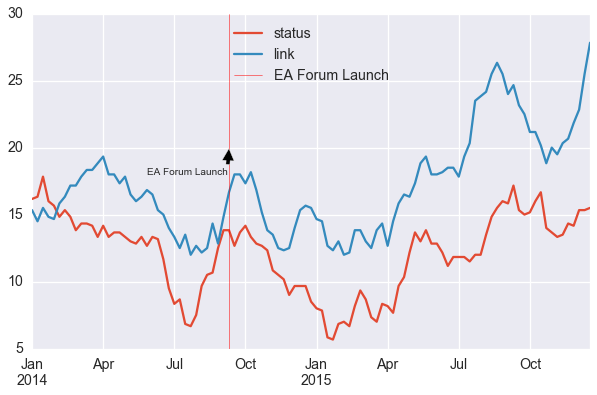

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

pd.rolling_mean(posts_types,6)['2014-01':'2015'].plot(ax=ax)
plt.axvline(x=pd.to_datetime('2014-09-09'),linewidth=0.5,color='r',label='EA Forum Launch')
plt.annotate('EA Forum Launch', xy=(pd.to_datetime('2014-09-09'), 20),xytext=(pd.to_datetime('2014-06-01'),18),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc='upper center')
ax.set_xlabel('')

## This locally looks significant, but there may have been a pre-existing trend.

As noted above, the bump near the EA Forum Launch should be more to the left. There appears to be a pre-existing downwards trend, but possible EA Forum Launch accelerated it before whatever caused the recent growth came along.

# Analysis of Contributors
## Who's been posting? And how much? And how has it changed over time?

### Barplot: Unique Contributors


c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


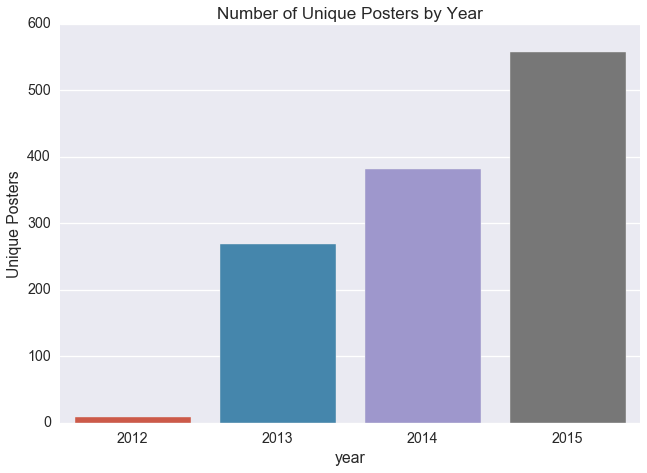

In [10]:
posts['year']=posts.index.year
postersYear = posts.groupby(['year','authorName']).count()['id'].reset_index(level=1)
postersYear = postersYear.reset_index().groupby('year').count()
postersYear.reset_index(inplace=True)
ax = sns.barplot(x='year',y='id',data=postersYear)
#postersYear.reset_index().plot(x='year',y='id')
ax.set_ylabel('Unique Posters')
ax.set_title('Number of Unique Posters by Year')

The number of unique posters posting in a given year has increased linearly each year since 2013. More people are participating in the group, as we'd hope from an increasing membership.

But in what way are new people contributing? 

## How many single-time contributors are there?

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


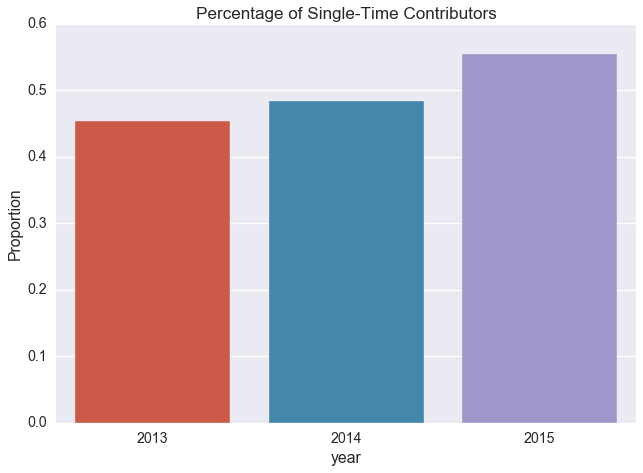

In [11]:
postersYear = posts.groupby(['year','authorName']).count()['id']
postersYear= postersYear.reset_index(level=0)
postersYear

N = 1
PostProps = pd.DataFrame()
PostProps['Fraction'] = postersYear[postersYear['id']<=N].groupby('year').count()['id']
PostProps['FractionC'] = postersYear[postersYear['id']>N].groupby('year').count()['id']
PostProps['Total'] = postersYear.groupby('year').count()['id']
PostProps['Percent'] = PostProps['Fraction']/PostProps['Total']
PostProps.drop(2012)
#postersYear[postersYear['id']<4].groupby('year').count()

PostProps.drop(PostProps.index[0],axis=0,inplace=True)
ax = sns.barplot(x='year',y='Percent',data=PostProps.reset_index())
ax.set_ylabel('Proportion')
ax.set_title('Percentage of Single-Time Contributors')


While there are increased number of different people contributing each year, the average amount each person contributes is falling. As shown in the above plot, the proportion of posters making only a single post (in the year) has risen each year.

The below table shows mean number of posts per poster for each year, also decreasing from 5.2 in 2013 to 3.1 in 2015.

In [12]:
postersYear = posts.groupby(['year','authorName']).count()['id']
postersYear= postersYear.reset_index(level=0)
postersYear.rename(columns={'id':'meanPostsPerContributer'},inplace=True)
postersYear.reset_index(level=0).groupby('year').mean().round(2)


,meanPostsPerContributer
year,
2012,2.56
2013,5.20
2014,4.04
2015,3.08


## Number of Super-Contributors

In [13]:
postersYear = posts.groupby(['year','authorName']).count()['id']
postersYear= postersYear.reset_index(level=0)
postersYear

N = 10
PostProps = pd.DataFrame()
PostProps['Fraction'] = postersYear[postersYear['id']<=N].groupby('year').count()['id']
PostProps['FractionC'] = postersYear[postersYear['id']>N].groupby('year').count()['id']
PostProps['Total'] = postersYear.groupby('year').count()['id']
PostProps['Percent'] = PostProps['Fraction']/PostProps['Total']
PostProps.drop(2012)
#postersYear[postersYear['id']<4].groupby('year').count()

# Number of super posters has diminished.

,Fraction,FractionC,Total,Percent
year,,,,
2013,240,29,269,0.892193
2014,353,29,382,0.924084
2015,536,22,558,0.960573


The number of people contributing regularly to the group has fallen over time. Contributors who made more than 10 posts in a year were constant between 2013 and 2014, but have fallen in 2015. The group is not attracting/inciting people who will post ~once a month. 

I'm not sure what significance to attach to that.

# Who's been posting the most?

## CONTRIBUTORS TABLES
* 1: All Time
* 2: 2015
* 3: 2014
* 4: 2013

Half or more of the top contributors list has stayed the same since 2013.


In [14]:
def TopContsFunc(posts,year=None):
    
    if(year):
        posts = posts[posts['year']==year]

    TopConts = posts.groupby('authorName').agg({'id': 'count',
                                            'likesCount' : np.sum,
                                              'commentsCount' : np.sum,
                                              'sharesCount' : np.sum
                                              }).sort_values(by='id',ascending=False)

    TopConts = TopConts[['id','likesCount','commentsCount','sharesCount']]
    TopConts.rename(columns={'id':'postsCount'},inplace=True)
    TopConts['LikesPerPost'] = np.round(TopConts['likesCount']/TopConts['postsCount'],2)
    TopConts['CommentsPerPost'] = np.round(TopConts['commentsCount']/TopConts['postsCount'],2)
    TopConts['SharesPerPost'] = np.round(TopConts['sharesCount']/TopConts['postsCount'],2)
    TopConts.reset_index(inplace=True)
    return TopConts

### Table 4: TOP 20 CONTRIBUTORS (posts) ALL TIME

In [16]:
TopContsFunc(posts).head(20)

,authorName,postsCount,likesCount,commentsCount,sharesCount,LikesPerPost,CommentsPerPost,SharesPerPost
0,Robert Wiblin,187,5200,2108,463,27.81,11.27,2.48
1,Ruairí Donnelly,150,1129,1159,63,7.53,7.73,0.42
2,Peter Hurford,144,1904,1126,60,13.22,7.82,0.42
3,Howard Alexander Daniels,107,470,628,18,4.39,5.87,0.17
4,Vipul Naik,89,570,763,11,6.40,8.57,0.12
5,Ryan Carey,84,1241,513,53,14.77,6.11,0.63
6,Holly Morgan,83,967,1066,14,11.65,12.84,0.17
7,Pablo Stafforini,77,956,448,56,12.42,5.82,0.73
8,Tyler Alterman,73,966,585,20,13.23,8.01,0.27
9,Matt Sharp,69,334,450,39,4.84,6.52,0.57


### TOP 15 CONTRIBUTORS, 2015

In [17]:
TopContsFunc(posts,2015).head(15)

,authorName,postsCount,likesCount,commentsCount,sharesCount,LikesPerPost,CommentsPerPost,SharesPerPost
0,Robert Wiblin,135,4431,1701,442,32.82,12.60,3.27
1,Tyler Alterman,60,932,527,20,15.53,8.78,0.33
2,Ryan Carey,45,686,190,41,15.24,4.22,0.91
3,Tom Ash,36,676,297,27,18.78,8.25,0.75
4,Benjamin Todd,29,379,166,17,13.07,5.72,0.59
5,Nick Horslen,27,49,26,3,1.81,0.96,0.11
6,Vipul Naik,24,214,156,6,8.92,6.50,0.25
7,Michael Dello-Iacovo,23,67,94,1,2.91,4.09,0.04
8,William MacAskill,21,741,121,66,35.29,5.76,3.14
9,Gleb Tsipursky,21,97,66,6,4.62,3.14,0.29


All time contributor leader Rob Wiblin actually made most of his posts (135/187) this year.

### TOP 15 CONTRIBUTORS, 2014

In [18]:
TopContsFunc(posts,2014).head(15)

,authorName,postsCount,likesCount,commentsCount,sharesCount,LikesPerPost,CommentsPerPost,SharesPerPost
0,Peter Hurford,77,1128,576,36,14.65,7.48,0.47
1,Vipul Naik,63,351,603,4,5.57,9.57,0.06
2,Robert Wiblin,45,633,367,16,14.07,8.16,0.36
3,Pablo Stafforini,37,469,251,13,12.68,6.78,0.35
4,Howard Alexander Daniels,34,167,184,4,4.91,5.41,0.12
5,Ryan Carey,33,521,304,12,15.79,9.21,0.36
6,William MacAskill,29,791,545,120,27.28,18.79,4.14
7,Sasha Cooper,28,61,117,0,2.18,4.18,0.00
8,Tom Ash,27,347,227,16,12.85,8.41,0.59
9,Matt Sharp,27,102,221,5,3.78,8.19,0.19


### TOP 15 CONTRIBUTORS, 2013

In [19]:
TopContsFunc(posts,2013).head(15)

,authorName,postsCount,likesCount,commentsCount,sharesCount,LikesPerPost,CommentsPerPost,SharesPerPost
0,Ruairí Donnelly,111,662,878,45,5.96,7.91,0.41
1,Howard Alexander Daniels,72,296,444,14,4.11,6.17,0.19
2,Holly Morgan,58,536,716,13,9.24,12.34,0.22
3,Peter Hurford,54,441,420,13,8.17,7.78,0.24
4,Dean Mullen,41,115,691,0,2.80,16.85,0.00
5,David Hale,34,54,341,1,1.59,10.03,0.03
6,Matt Sharp,32,183,188,26,5.72,5.88,0.81
7,Chris Hennick,31,38,487,2,1.23,15.71,0.06
8,Ozzie Gooen,29,164,213,5,5.66,7.34,0.17
9,Pablo Stafforini,27,202,113,10,7.48,4.19,0.37


# APPENDIX A: Weekly Totals with 6-Week MA Filter

c:\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


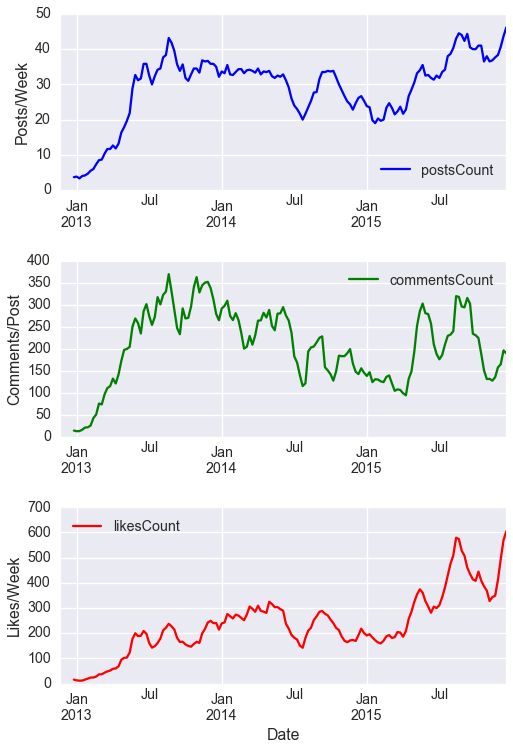

In [20]:
Posts = posts.resample('W',how='sum')[['postsCount','commentsCount','likesCount']]

fig = plt.figure(figsize=(8,12))
fig.subplots_adjust(hspace=0.4)
ax = fig.add_subplot(1,1,1)

Ax = pd.rolling_mean(Posts,6).plot(subplots=True,ax=ax)
Ax[0].set_ylabel('Posts/Week'); Ax[0].set_xlabel('')
Ax[1].set_ylabel('Comments/Post'); Ax[1].set_xlabel('')
Ax[2].set_ylabel('Likes/Week'); Ax[1].set_xlabel('')
